

### Library imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import csv
from datetime import datetime as dt
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [11]:
'''
Task 1
Load the data from both files (Employees and Projects) using defaultdict or pandas
'''
projects = pd.read_csv('Projects.csv', parse_dates=['Start Date', 'Expected End Date', 'Actual End'])
employees = pd.read_csv('Employees .csv')

projects.head()

,Project ID,Start Date,Expected End Date,Actual End,Expected Assigned Employees
0,1,2016-11-22,2017-08-23,2017-09-28,9
1,2,2016-08-12,2017-04-10,2018-11-02,10
2,3,2015-06-18,2016-01-25,2016-04-06,7
3,4,2015-06-20,2016-04-04,2016-01-04,9
4,5,2015-02-07,2016-07-15,2016-11-07,12


In [4]:
employees.head()

,EID,PID
0,100,1
1,101,1
2,102,1
3,103,1
4,104,1


## Fixing Data Types

In [12]:
'''
Task 2
Convert each column of data from both files
to a suitable datatype
'''
projects.info()
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Project ID                     100 non-null int64
Start Date                     100 non-null datetime64[ns]
Expected End Date              100 non-null datetime64[ns]
Actual End                     100 non-null datetime64[ns]
Expected Assigned Employees    100 non-null int64
dtypes: datetime64[ns](3), int64(2)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 2 columns):
EID    1090 non-null int64
PID    1090 non-null int64
dtypes: int64(2)
memory usage: 17.1 KB


## Know your Data

In [14]:
'''
Task 3
Implement some statistical measures to understand your data
examples are: max, min, mean, standard deviation
'''

projects.describe()

,Project ID,Expected Assigned Employees
count,100.000000,100.000000
mean,50.500000,9.320000
std,29.011492,2.597124
min,1.000000,4.000000
25%,25.750000,7.000000
50%,50.500000,9.000000
75%,75.250000,11.000000
max,100.000000,16.000000


## Investigate the dataset

The company owner complains that projects are almost always behind schedule. As a solution, when a project is late he assigns more employees to work on it. Your job here as a data analyst is to investigate the data, assess his solution, and maybe propose another.

In [26]:
'''
Task 4
To start investigating the data, you first
need to compute the actual number of employees
assigned for each project. This can be calculated
from the employees data file.
'''


#projects.merge(employees, right_on='EID')
counts = employees.groupby('PID').count()
counts

,EID
PID,
1,10
2,14
3,11
4,9
5,12
6,11
7,10
8,14
9,13


### Assessing Owner's Solution

In [30]:
'''
Task 5
Find the relation between the number of extra employees hired
and the delay for each project.
'''

new_df = projects.merge(counts, left_on='Project ID', right_on='PID')

In [64]:
new_df['Delay'] = (new_df['Actual End'] - new_df['Expected End Date']).dt.days
new_df.describe()

,Project ID,Expected Assigned Employees,EID,Delay,Extra Employees
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,9.320000,10.900000,86.740000,1.580000
std,29.011492,2.597124,3.030152,133.899602,1.505411
min,1.000000,4.000000,4.000000,-262.000000,0.000000
25%,25.750000,7.000000,9.000000,0.000000,0.000000
50%,50.500000,9.000000,11.000000,82.000000,1.000000
75%,75.250000,11.000000,13.000000,157.750000,3.000000
max,100.000000,16.000000,19.000000,571.000000,4.000000


### Communicate your results and findings

Write your final opinion after investigating the data. Did assigning more employees help keep projects on schedule? If not, then what would be a good solution?

**Your Answer** - *Replace this line with your answer*


<BarContainer object of 100 artists>

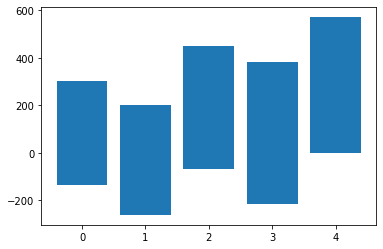

In [54]:
new_df['Extra Employees'] = new_df['EID'] - new_df['Expected Assigned Employees']
new_df.head(10)
plt.bar( new_df['Extra Employees'], new_df['Delay'])

In [65]:
new_df.corr()

,Project ID,Expected Assigned Employees,EID,Delay,Extra Employees
Project ID,1.000000,0.071723,0.041940,0.019039,-0.039318
Expected Assigned Employees,0.071723,1.000000,0.867927,0.077389,0.021805
EID,0.041940,0.867927,1.000000,0.271670,0.515500
Delay,0.019039,0.077389,0.271670,1.000000,0.413317
Extra Employees,-0.039318,0.021805,0.515500,0.413317,1.000000


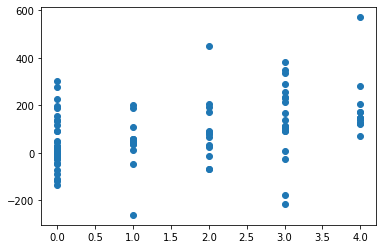

In [69]:
plt.scatter(new_df['Extra Employees'], new_df['Delay'])

The bar chart above show that assiging more employees to the projects does not affect the dealy in projects.